In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D, LSTM, GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

import math

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

np.random.seed(123)
tf.random.set_seed(123)

In [94]:
df=pd.read_csv('./INFY.csv',index_col='Date',parse_dates=True)

In [95]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,INFY,EQ,1333.80,1332.25,1351.30,1321.00,1345.00,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
2021-04-27,INFY,EQ,1343.55,1346.00,1353.00,1340.15,1347.50,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
2021-04-28,INFY,EQ,1348.50,1358.00,1359.50,1344.60,1355.80,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856


In [96]:
df['Date']=df.index

In [97]:
start_date='2011-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [98]:
df=df.loc[mask]

In [99]:
df=df.drop(columns=['Series','Symbol','Open','High','Low','Last','Close','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble','Date'])

In [100]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [101]:
train_idx=df.index<=train.index[-1]
test_idx=df.index>train.index[-1]

In [102]:
df['Diff Prev Close']=df['Prev Close'].diff()

In [103]:
series=df['Diff Prev Close'].dropna().to_numpy()

T=50
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print("X.shape",X.shape,"Y.shape",Y.shape)

X.shape (2427, 50) Y.shape (2427,)


In [104]:
Xtrain,Ytrain=X[:-Ntest],Y[:-Ntest]
Xtest,Ytest=X[-Ntest:],Y[-Ntest:]

LSTM+CNN

In [105]:
i=Input(shape=(T,1))
x=LSTM(200,return_sequences=True)(i)
x=LSTM(200,return_sequences=True)(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=Conv1D(25,3,activation='relu')(i)
x=MaxPooling1D(2)(x)
x=Conv1D(50,3,activation='relu')(x)
x=GlobalMaxPool1D()(x)
x=Dense(1)(x)
model_lstm_cnn=Model(i,x)
model_lstm_cnn.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 48, 25)            100       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 24, 25)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 22, 50)            3800      
                                                                 
 global_max_pooling1d_5 (Glo  (None, 50)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_23 (Dense)            (None, 1)                 51  

In [106]:
check_point_lstm_cnn=ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True)

In [107]:
model_lstm_cnn.compile(loss='mse',
              optimizer='adamax',
              metrics=['mae','mse'])

In [108]:
r=model_lstm_cnn.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest,Ytest),
    callbacks=[check_point_lstm_cnn]
)

Epoch 1/100
53/53 [==============================] - 1s 10ms/step - loss: 5450.8438 - mae: 27.9389 - mse: 5450.8438 - val_loss: 936.7037 - val_mae: 12.7126 - val_mse: 936.7037
Epoch 2/100
53/53 [==============================] - 0s 7ms/step - loss: 5364.4375 - mae: 27.2156 - mse: 5364.4375 - val_loss: 921.7069 - val_mae: 12.4795 - val_mse: 921.7069
Epoch 3/100
53/53 [==============================] - 0s 7ms/step - loss: 5327.5244 - mae: 27.0472 - mse: 5327.5244 - val_loss: 926.0096 - val_mae: 12.5215 - val_mse: 926.0096
Epoch 4/100
53/53 [==============================] - 0s 7ms/step - loss: 5315.8867 - mae: 27.0674 - mse: 5315.8867 - val_loss: 923.5245 - val_mae: 12.4570 - val_mse: 923.5245
Epoch 5/100
53/53 [==============================] - 0s 7ms/step - loss: 5304.2837 - mae: 27.0410 - mse: 5304.2837 - val_loss: 917.3461 - val_mae: 12.3705 - val_mse: 917.3461
Epoch 6/100
53/53 [==============================] - 0s 7ms/step - loss: 5284.5767 - mae: 26.8976 - mse: 5284.5767 - val_los

LSTM+GRU

In [109]:
i=Input(shape=(T,1))
x=LSTM(200,return_sequences=True)(i)
x=LSTM(200,return_sequences=True)(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=GRU(200,return_sequences=True)(x)
x=GRU(200,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(100)(x)
x=Dense(50)(x)
x=Dense(1)(x)
model_lstm_gru=Model(i,x)
model_lstm_gru.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm_12 (LSTM)              (None, 50, 200)           161600    
                                                                 
 lstm_13 (LSTM)              (None, 50, 200)           320800    
                                                                 
 dense_24 (Dense)            (None, 50, 100)           20100     
                                                                 
 dense_25 (Dense)            (None, 50, 50)            5050      
                                                                 
 gru_6 (GRU)                 (None, 50, 200)           151200    
                                                                 
 gru_7 (GRU)                 (None, 50, 200)           2412

In [110]:
check_point_lstm_gru=ModelCheckpoint('best_model.h5',monitor='val_loss',save_best_only=True)

In [111]:
model_lstm_gru.compile(loss='mse',
              optimizer='adamax',
              metrics=['mae','mse'])

In [112]:
r=model_lstm_gru.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest,Ytest),
    callbacks=[check_point_lstm_gru]
)

Epoch 1/100
53/53 [==============================] - 38s 580ms/step - loss: 5284.1714 - mae: 26.4428 - mse: 5284.1714 - val_loss: 912.5319 - val_mae: 12.1836 - val_mse: 912.5319
Epoch 2/100
53/53 [==============================] - 29s 548ms/step - loss: 5282.6079 - mae: 26.4157 - mse: 5282.6079 - val_loss: 912.7703 - val_mae: 12.2053 - val_mse: 912.7703
Epoch 3/100
53/53 [==============================] - 29s 549ms/step - loss: 5282.1777 - mae: 26.4329 - mse: 5282.1777 - val_loss: 913.3981 - val_mae: 12.2438 - val_mse: 913.3981
Epoch 4/100
53/53 [==============================] - 29s 552ms/step - loss: 5280.0449 - mae: 26.4141 - mse: 5280.0449 - val_loss: 913.5186 - val_mae: 12.2492 - val_mse: 913.5186
Epoch 5/100
53/53 [==============================] - 29s 550ms/step - loss: 5279.2246 - mae: 26.4340 - mse: 5279.2246 - val_loss: 913.9757 - val_mae: 12.2713 - val_mse: 913.9757
Epoch 6/100
53/53 [==============================] - 29s 549ms/step - loss: 5278.2471 - mae: 26.4419 - mse: 52

Predictions



In [113]:
train_idx[:T+1]=False

In [114]:
Ptrain_lstm_cnn=model_lstm_cnn.predict(Xtrain).flatten()
Ptest_lstm_cnn=model_lstm_cnn.predict(Xtest).flatten()

In [115]:
Ptrain_lstm_gru=model_lstm_gru.predict(Xtrain).flatten()
Ptest_lstm_gru=model_lstm_gru.predict(Xtest).flatten()

In [ ]:
df.loc[train_idx,'Diff LSTM+CNN train prediction']=Ptrain_lstm_cnn
df.loc[test_idx,'Diff LSTM+CNN test prediction']=Ptest_lstm_cnn

In [117]:
df.loc[train_idx,'Diff LSTM+GRU train prediction']=Ptrain_lstm_gru
df.loc[test_idx,'Diff LSTM+GRU test prediction']=Ptest_lstm_gru

In [118]:
df['Shift Prev Close']=df['Prev Close'].shift(1)
prev=df['Shift Prev Close']

In [119]:
last_train=train.iloc[-1]['Prev Close']

In [120]:
df.loc[train_idx,'train_LSTM_CNN']=prev[train_idx]+Ptrain_lstm_cnn
df.loc[test_idx,'Prediction_LSTM_CNN']=prev[test_idx]+Ptest_lstm_cnn

In [121]:
df.loc[train_idx,'train_LSTM_GRU']=prev[train_idx]+Ptrain_lstm_gru
df.loc[test_idx,'Prediction_LSTM_GRU']=prev[test_idx]+Ptest_lstm_gru

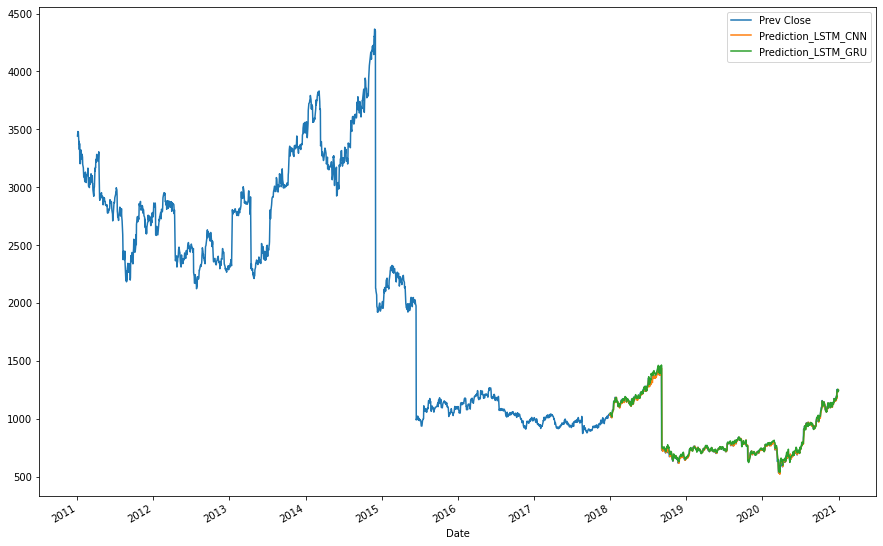

In [122]:
df[['Prev Close' ,'Prediction_LSTM_CNN','Prediction_LSTM_GRU']].plot(figsize=(15,10));

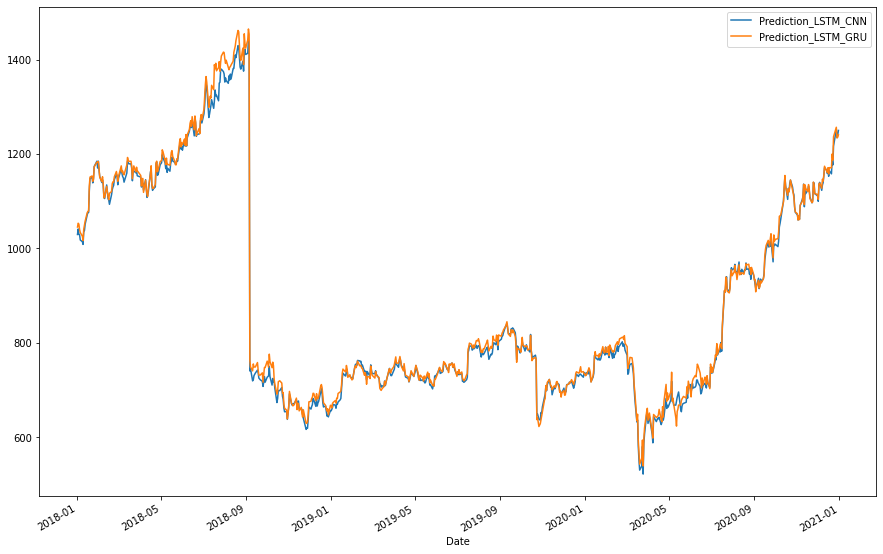

In [123]:
df[['Prediction_LSTM_CNN','Prediction_LSTM_GRU']].plot(figsize=(15,10));

In [124]:
pred_lstm_cnn=df['Prediction_LSTM_CNN']
pred_lstm_cnn.dropna(inplace=True)

In [125]:
rmse=math.sqrt(mean_squared_error(test['Prev Close'],pred_lstm_cnn))
print(rmse)

30.244741122602676


In [126]:
error=mean_absolute_error(test['Prev Close'],pred_lstm_cnn)
print(error)

12.442746770590503


In [127]:
r2_score(test['Prev Close'],pred_lstm_cnn)

0.9821323549184373

In [128]:
pred_lstm_gru=df['Prediction_LSTM_GRU']
pred_lstm_gru.dropna(inplace=True)

In [129]:
rmse=math.sqrt(mean_squared_error(test['Prev Close'],pred_lstm_cnn))
print(rmse)

30.244741122602676


In [130]:
error=mean_absolute_error(test['Prev Close'],pred_lstm_gru)
print(error)

15.10899246517684


In [131]:
r2_score(test['Prev Close'],pred_lstm_gru)

0.9790179769436936